# Weather Prediction using (Naive Bayes (NB),Logistic Regression (LR),Support Vector Machine (SVM),K-Nearest Neighbors (KNN),Artificial Neural Networks (ANN))

# 1- Import library

In [9]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# 2- Read weather dataset

In [11]:
#importons le dataset
df=pd.read_csv('/content/drive/My Drive/seattle-weather.csv')

In [12]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


# 3- Understand and Prepare the Data

In [13]:

print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values :  \n",df.nunique())

Rows     :  1461
Columns  :  6

Features : 
 ['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather']

Missing values :   0

Unique values :  
 date             1461
precipitation     111
temp_max           67
temp_min           55
wind               79
weather             5
dtype: int64


In [14]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[float, int])

# Calculate correlation matrix for numeric columns
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
print(correlation_matrix)


               precipitation  temp_max  temp_min      wind
precipitation       1.000000 -0.228555 -0.072684  0.328045
temp_max           -0.228555  1.000000  0.875687 -0.164857
temp_min           -0.072684  0.875687  1.000000 -0.074185
wind                0.328045 -0.164857 -0.074185  1.000000


In [15]:
df["weather"].unique()

array(['drizzle', 'rain', 'sun', 'snow', 'fog'], dtype=object)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [17]:
df["weather"].unique()

array(['drizzle', 'rain', 'sun', 'snow', 'fog'], dtype=object)

In [18]:
# get unique value count in each columns
df.nunique()

,0
date,1461
precipitation,111
temp_max,67
temp_min,55
wind,79
weather,5


In [19]:
df.count()

,0
date,1461
precipitation,1461
temp_max,1461
temp_min,1461
wind,1461
weather,1461


In [20]:
df.weather.value_counts()

,count
weather,
rain,641
sun,640
fog,101
drizzle,53
snow,26


In [21]:
df["date"]=pd.to_datetime(df["date"])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


# 4-Visualisation

In [23]:
fig = px.histogram(df, x="weather",text_auto=True ,color='weather',title='most weather state persent').update_xaxes(categoryorder='total descending')
fig.show()

In [24]:
fig = px.pie(df, names="weather",color='weather',title='the most weather percent  ')
fig.show()

In [25]:
fig = px.histogram(df, x='weather',y="precipitation",color='weather',histfunc="avg",text_auto=True, title='Average of precipitation in each weather state').update_xaxes(categoryorder='total descending')
fig.show()

In [26]:
fig = px.histogram(df, x='weather',y="temp_max",color='weather',histfunc="avg",text_auto=True, title='most average temprature per weather state').update_xaxes(categoryorder='total descending')
fig.show()

In [27]:
fig = px.histogram(df, x='weather',y="wind",color='weather',histfunc="avg",text_auto=True, title='wind average in each weather state').update_xaxes(categoryorder='total ascending')
fig.show()

# 5- Feature engineering and selection

In [28]:
# feature engineering and selection
x = df[['precipitation', 'temp_max','temp_min','wind']].copy()
y=df[['weather']].copy()
x.head()

,precipitation,temp_max,temp_min,wind
0,0.0,12.8,5.0,4.7
1,10.9,10.6,2.8,4.5
2,0.8,11.7,7.2,2.3
3,20.3,12.2,5.6,4.7
4,1.3,8.9,2.8,6.1


## 6-Convert weather value to numerical value

In [29]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
# conver subject column to numirical value
df['weather']= labelencoder.fit_transform(df[['weather']].copy())
y=df[['weather']].copy()

# 7-Correlation Matrix

<Axes: >

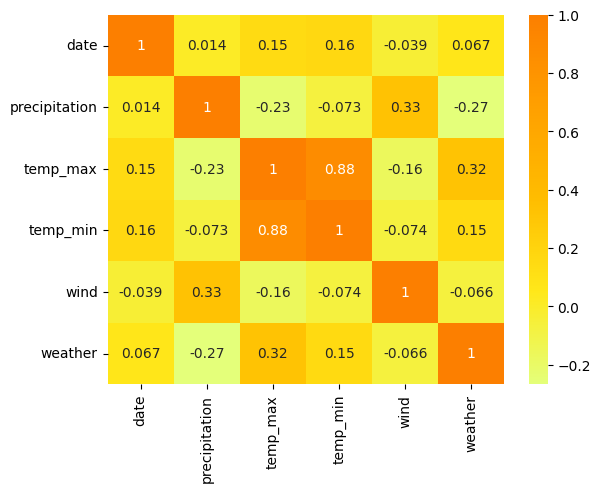

In [30]:
# the relationship between variables
sns.heatmap(df.corr(),cmap = 'Wistia', annot= True)


## 8-Split dateset with cross validation

In [31]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y, random_state = 33, test_size = 0.33)

from sklearn.neural_network import MLPClassifier



# 9-Build our algorithms

In [32]:
models = []
models.append(("SVM",SVC()))
models.append(("NB",GaussianNB()))
models.append(("KNN",KNeighborsClassifier()))
models.append(("dt",DecisionTreeClassifier()))
models.append(("LR",LogisticRegression()))
models.append(("ANN",MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)))

results = []
names = []
m=[]
for name,model in models:
    kfold = KFold(n_splits=10)
    cv_result = cross_val_score(model,X_train,Y_train, cv = kfold,scoring = "accuracy")
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    m.append(results[i].mean())
    print('accurcy of ',names[i],':' ,results[i].mean())

accurcy of  SVM : 0.7903113822848727
accurcy of  NB : 0.8670418682937091
accurcy of  KNN : 0.7607405848937512
accurcy of  dt : 0.7770986745213548
accurcy of  LR : 0.8588786029875868
accurcy of  ANN : 0.8598884914790658


# 10-Accurcy of different classification models histogram

In [33]:
accuracy = pd.DataFrame({'Algorithm': names,'accuracy': m })
fig = px.histogram(accuracy, x='Algorithm',y="accuracy",color='Algorithm',text_auto=True,
                   title='Accurcy of different classification models').update_xaxes(categoryorder='total descending')
fig.show()


# 11-Best Accuracy of Machine learning Algorithm is Naive Bayes for my dataset.

In [34]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y, random_state = 22, test_size = 0.3)
nb = GaussianNB()
nb.fit(X_train,Y_train)
predictions = nb.predict(X_test)
# accuracy of svm(evaluate accuracy)
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
print("accuracy_score :",accuracy_score(Y_test,predictions))
print("MAE :", mean_absolute_error(Y_test,predictions))

accuracy_score : 0.8633257403189066
MAE : 0.3917995444191344


# 12-Classification report and confusion_matrix

In [35]:
from sklearn.metrics import classification_report, confusion_matrix


print('\n')
print("Precision, Recall, F1")
print('\n')
CR=classification_report(Y_test,predictions)
print(CR)
print('\n')



Precision, Recall, F1


              precision    recall  f1-score   support

           0       0.33      0.13      0.19        15
           1       0.00      0.00      0.00        25
           2       0.98      0.92      0.95       186
           3       0.62      0.56      0.59         9
           4       0.80      0.98      0.88       204

    accuracy                           0.86       439
   macro avg       0.55      0.52      0.52       439
weighted avg       0.81      0.86      0.83       439





In [36]:

print('\n')
print("Confusion Matrix")
print('\n')
CM=confusion_matrix(Y_test,predictions)
print(CM)



Confusion Matrix


[[  2   0   0   0  13]
 [  0   0   0   0  25]
 [  0   0 172   3  11]
 [  0   0   4   5   0]
 [  4   0   0   0 200]]


# 13-Predict new data entry

In [37]:
# entry shape ['precipitation', 'temp_max','temp_min','wind']
pred=nb.predict([[0,10,9,2]])

Interest_prediction=labelencoder.inverse_transform(pred)

print("weather Prediction is:",Interest_prediction)

weather Prediction is: ['sun']
